<a href="https://colab.research.google.com/github/minjeong-kim-git/Kaggle-Practice/blob/main/Day%2004/Day04_Walmart_Recruiting_Store_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Challenge 실습

## 1. 초기 세팅

In [1]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [2]:
! pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 데이터셋 불러오기

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/data/walmart-recruiting-store-sales-forecasting/train.csv/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/data/walmart-recruiting-store-sales-forecasting/test.csv/test.csv')
stores = pd.read_csv('/content/drive/MyDrive/data/walmart-recruiting-store-sales-forecasting/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/data/walmart-recruiting-store-sales-forecasting/features.csv/features.csv')

In [6]:
train_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
test_df.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## 3. 데이터 전처리

In [10]:
train_df = train_df.merge(stores, how='inner').merge(features, how='inner')
test_df = train_df.merge(stores, how='inner').merge(features, how='inner')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [12]:
# 결측치 계산
train_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [13]:
train_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [14]:
# 결측치 채우기
train_df.fillna(0, inplace=True)

In [15]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [16]:
train_df['Store'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [17]:
train_df['Dept'].nunique()

81

In [18]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [19]:
train_df['IsHoliday'].unique()

array([False,  True])

In [20]:
train_df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [21]:
# 날짜 변환

train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year
del train_df['Date']

In [22]:
train_df

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2,2010
1,1,2,50605.27,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2,2010
2,1,3,13740.12,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2,2010
3,1,4,39954.04,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2,2010
4,1,5,32229.38,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012
421566,45,94,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012
421567,45,95,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012
421568,45,97,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012


In [23]:
# 슈퍼볼
train_df.loc[(train_df["Day"] == 12) & (train_df["Month"] == 2) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 11) & (train_df["Month"] == 2) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 10) & (train_df["Month"] == 2) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 8) & (train_df["Month"] == 2) & (train_df["Year"] == 2013) , "IsHoliday"] = True

# 근로자의
train_df.loc[(train_df["Day"] == 10) & (train_df["Month"] == 9) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 9) & (train_df["Month"] == 9) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 7) & (train_df["Month"] == 9) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 6) & (train_df["Month"] == 9) & (train_df["Year"] == 2013) , "IsHoliday"] = True


# 추수감사절
train_df.loc[(train_df["Day"] == 26) & (train_df["Month"] == 11) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 25) & (train_df["Month"] == 11) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 23) & (train_df["Month"] == 11) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 29) & (train_df["Month"] == 11) & (train_df["Year"] == 2013) , "IsHoliday"] = True

# 크리스마스
train_df.loc[(train_df["Day"] == 31) & (train_df["Month"] == 12) & (train_df["Year"] == 2010) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 30) & (train_df["Month"] == 12) & (train_df["Year"] == 2011) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 28) & (train_df["Month"] == 12) & (train_df["Year"] == 2012) , "IsHoliday"] = True
train_df.loc[(train_df["Day"] == 27) & (train_df["Month"] == 12) & (train_df["Year"] == 2013) , "IsHoliday"] = True

In [24]:
train_df['MarkDown'] = train_df['MarkDown1'] + train_df['MarkDown2'] + train_df['MarkDown3'] + train_df['MarkDown4'] + train_df['MarkDown5']

train_df.head(5)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year,MarkDown
0,1,1,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
1,1,2,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
2,1,3,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
3,1,4,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0
4,1,5,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010,0.0


## 데이터 탐색

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

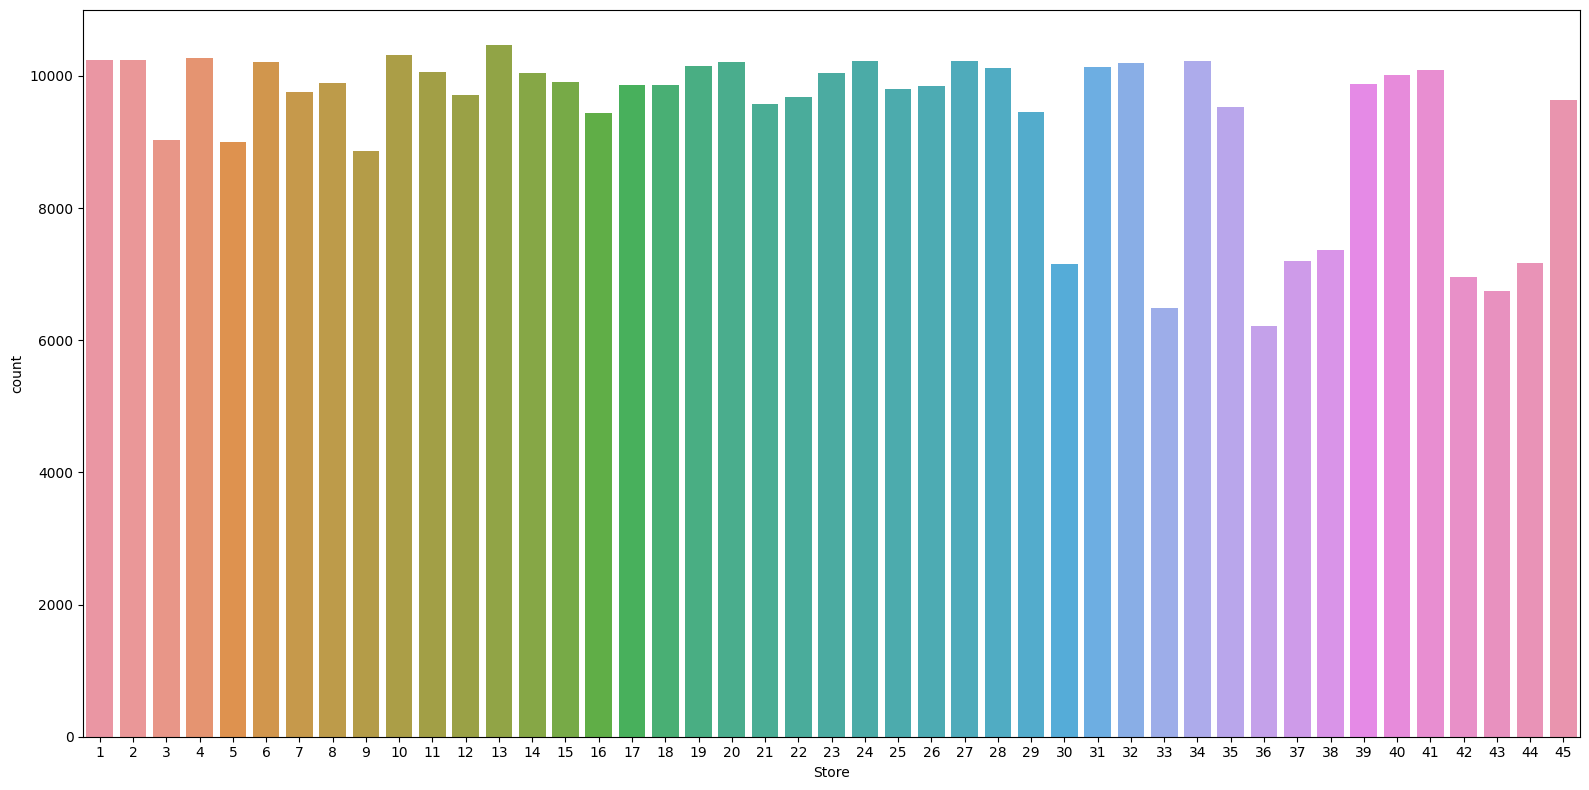

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(x=train_df['Store'])
plt.tight_layout()

<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  plt.tight_layout()
<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()
<ipython-input-27-3e82b14a23a1>:8: UserWarning: Glyph 47588 (

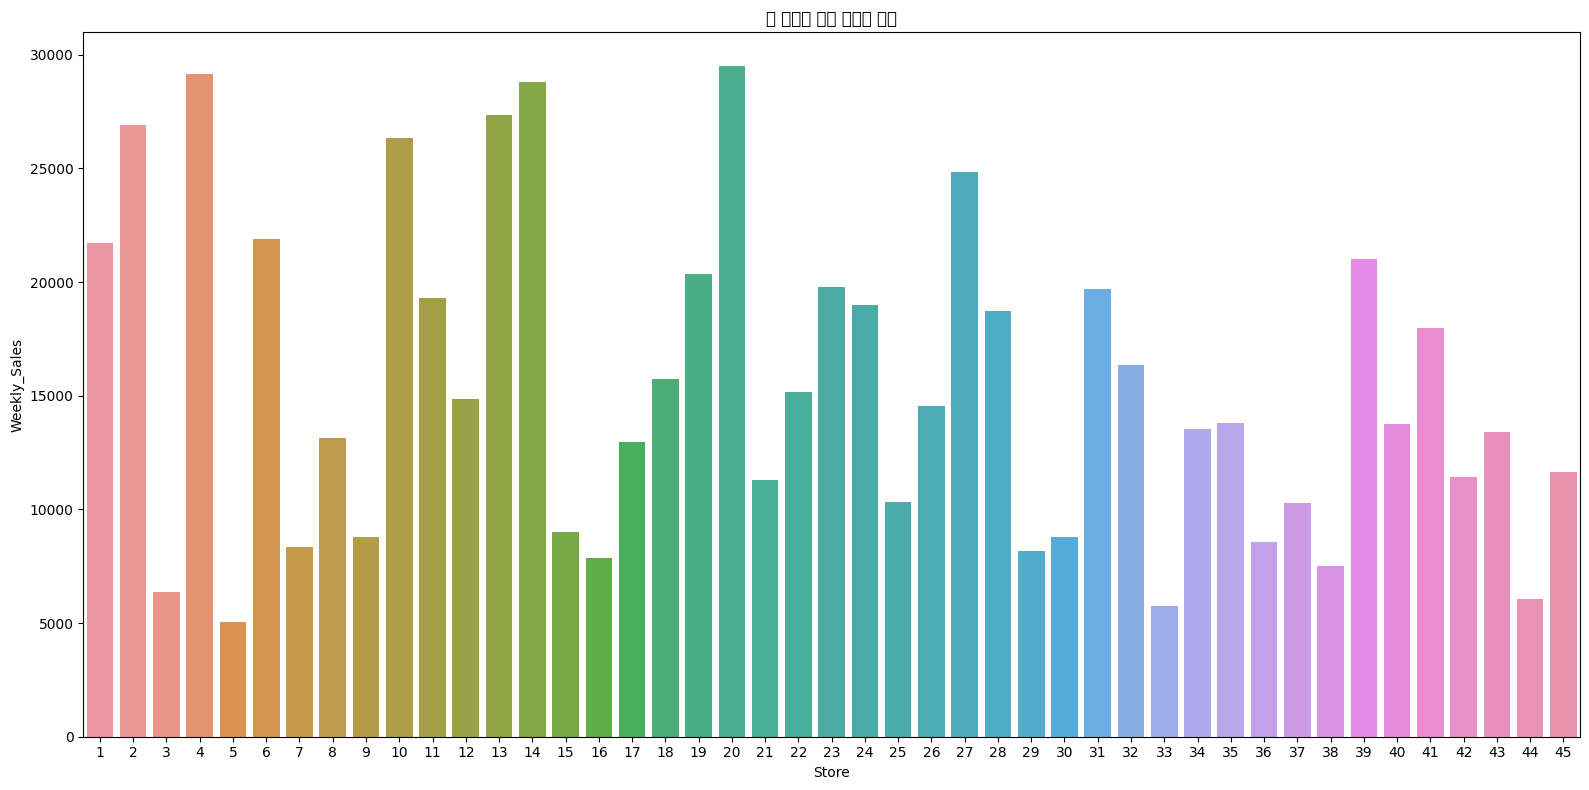

In [27]:
plt.figure(figsize=(16, 8))

# train_df의 데이터를 "Store"을 기준으로 "Weekly_Sales"을 정리한 데이터프레임 store_df
store_df = train_df.groupby("Store")["Weekly_Sales"].mean().to_frame().reset_index()
plt.ylabel("주 평균 판매량")
plt.title("각 점포별 주간 판매량 평균")
sns.barplot(x=store_df['Store'], y=store_df['Weekly_Sales'])
plt.tight_layout()

<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  plt.tight_layout()
<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-28-a80301cc7c94>:8: UserWarning: Glyph 50

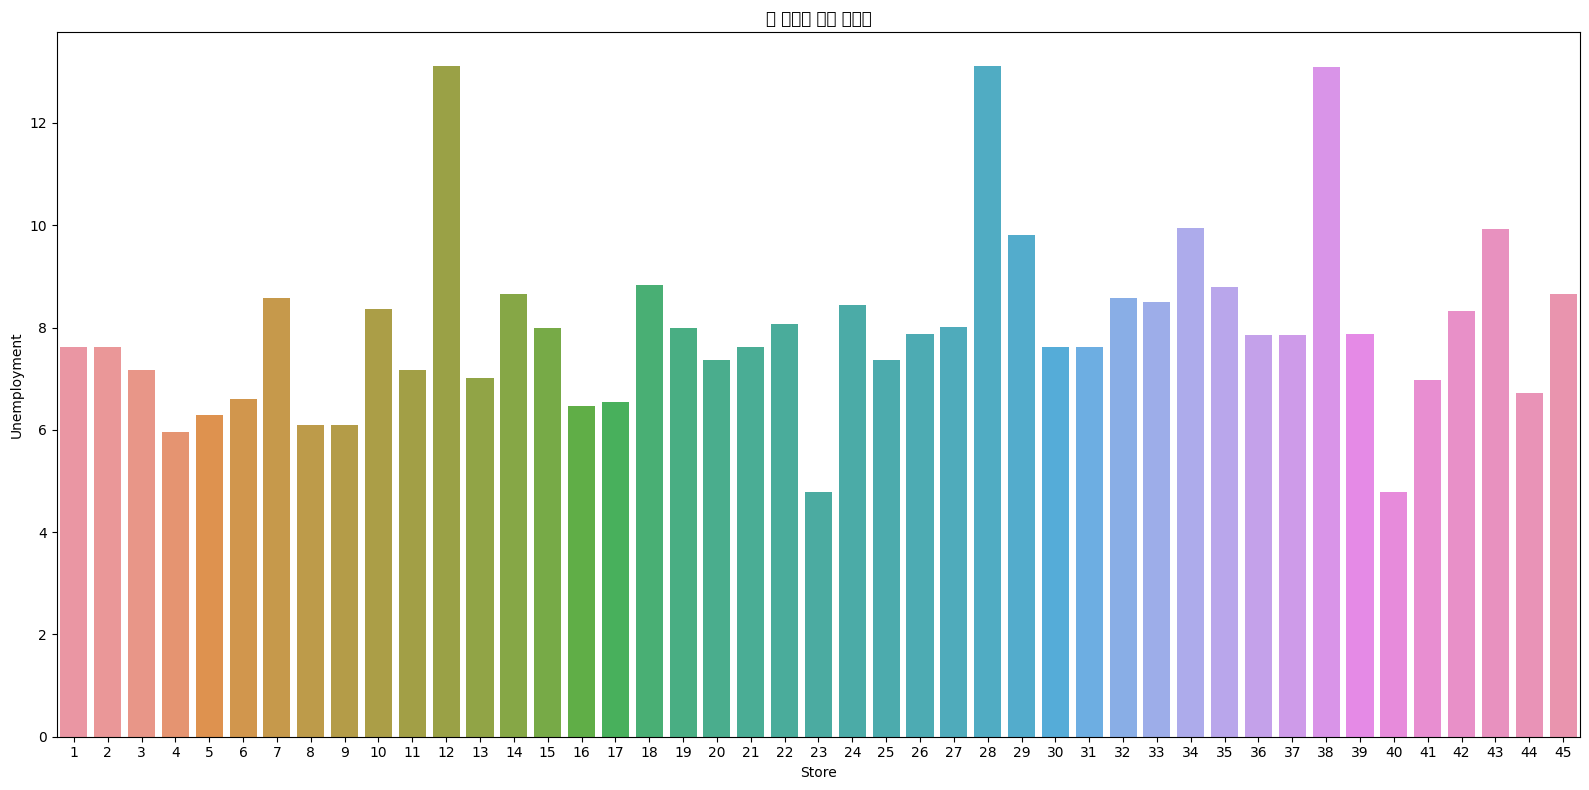

In [28]:
plt.figure(figsize=(16, 8))

# train_df의 데이터를 "Store"을 기준으로 "Unemployment"을 정리한 데이터프레임 store_df
store_df2 = train_df.groupby("Store")["Unemployment"].mean().to_frame().reset_index()
plt.ylabel("평균 실업률")
plt.title("각 점포별 평균 실업률")
sns.barplot(x=store_df2['Store'], y=store_df2['Unemployment'])
plt.tight_layout()

<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  plt.tight_layout()
<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  plt.tight_layout()
<ipython-input-29-dc408aa16905>:8: UserWarning: Glyph 533

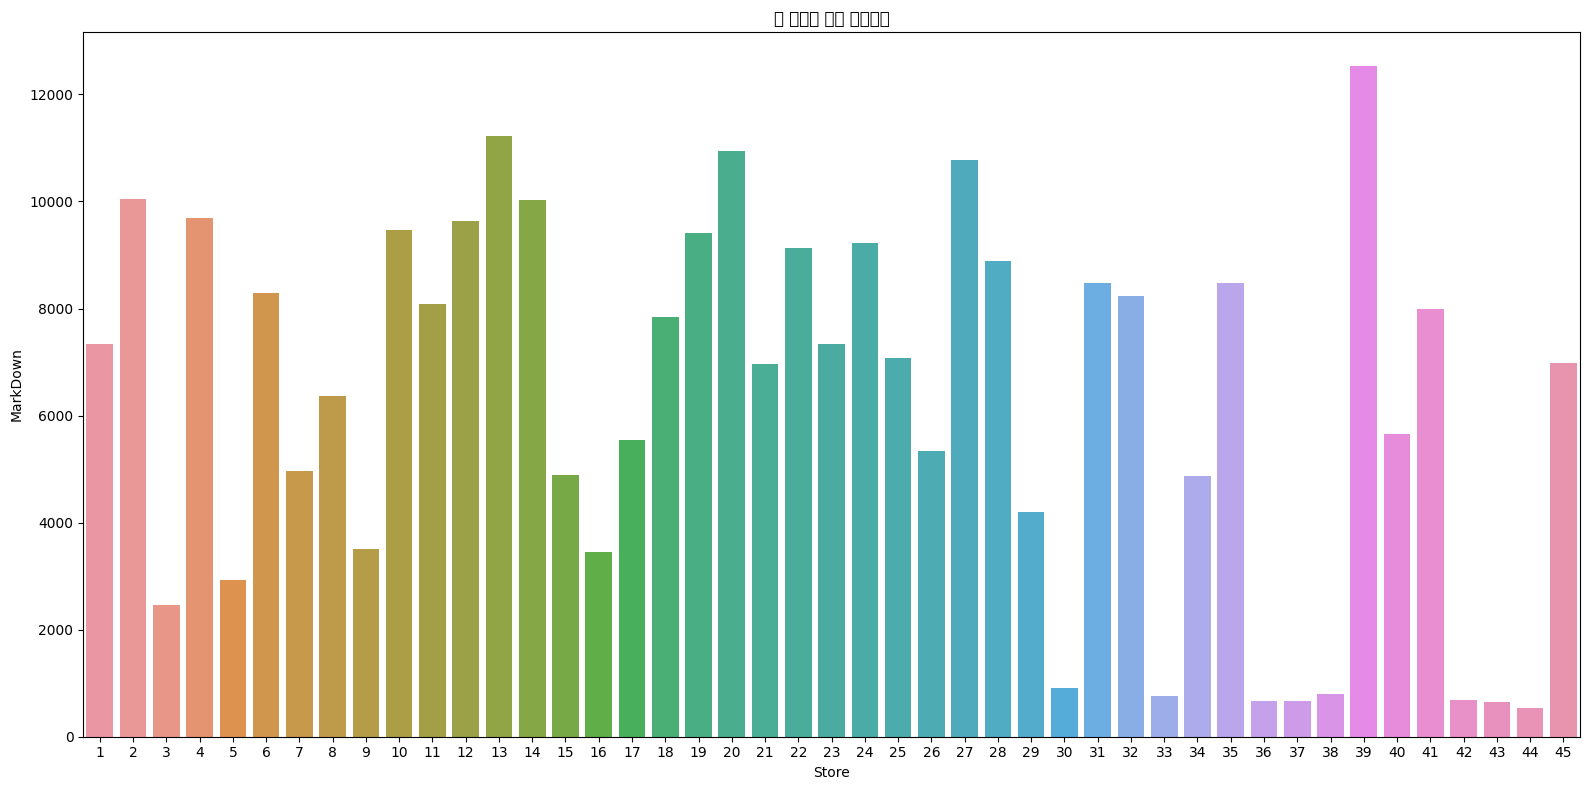

In [29]:
plt.figure(figsize=(16, 8))

# train_df의 데이터를 "Store"을 기준으로 "MarkDown"을 정리한 데이터프레임 store_df
store_df2 = train_df.groupby("Store")["MarkDown"].mean().to_frame().reset_index()
plt.ylabel("평균 마크다운")
plt.title("각 점포별 평균 마크다운")
sns.barplot(x=store_df2['Store'], y=store_df2['MarkDown'])
plt.tight_layout()

<ipython-input-30-d0aa32cc30c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = train_df['Dept'])


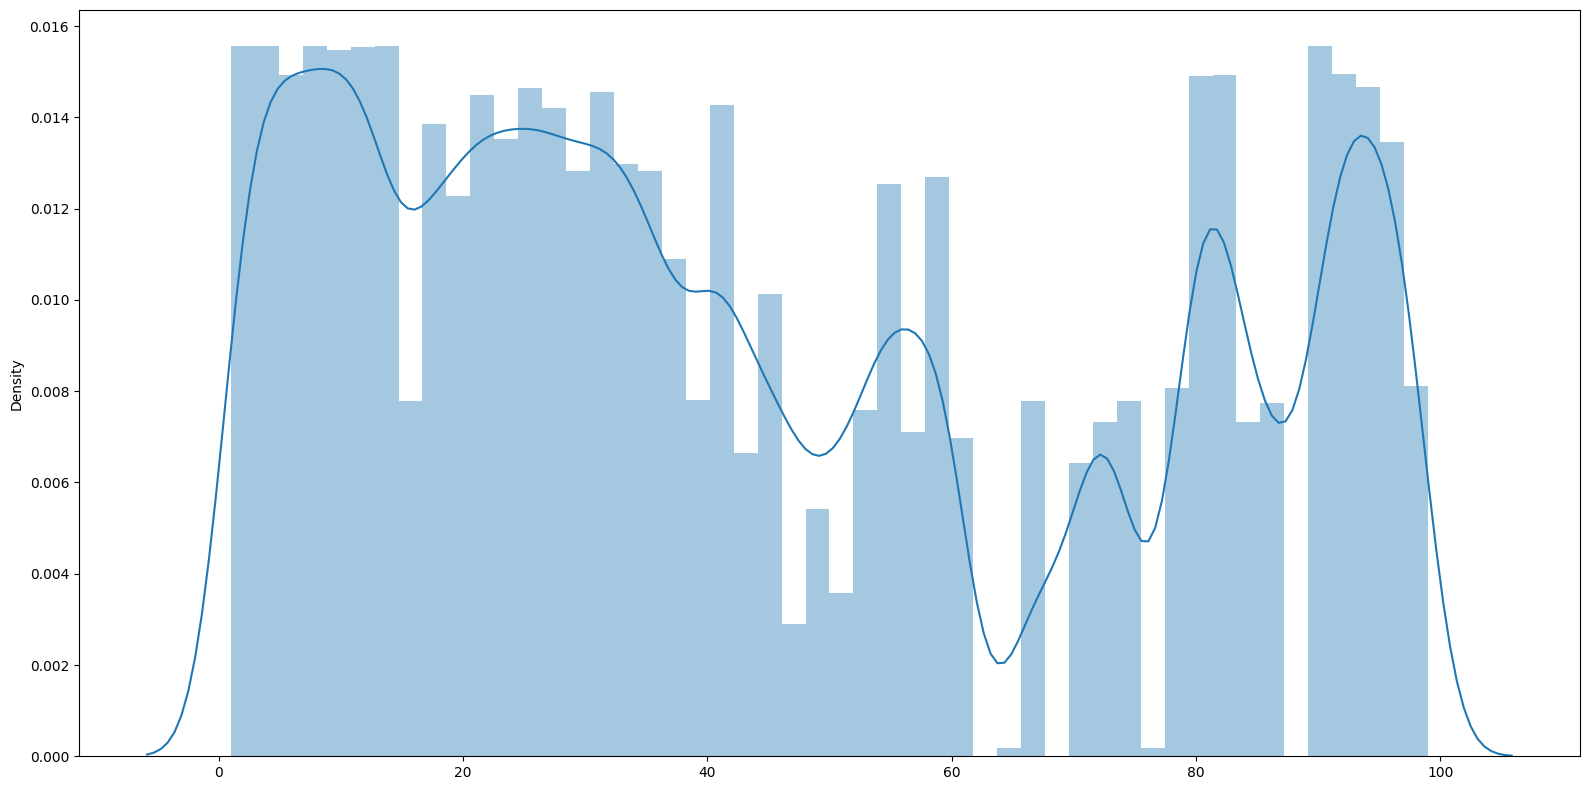

In [30]:
plt.figure(figsize=(16, 8))
sns.distplot(x = train_df['Dept'])
plt.tight_layout()

## 모델링

In [31]:
! pip install eli5

In [32]:
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
import eli5
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
import seaborn as sns
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [33]:
train_df.drop('MarkDown', axis = 1, inplace=True)

In [34]:
dummies = pd.get_dummies(train_df['Type'])
train_df = pd.concat([train_df, dummies], axis = 1)
train_df.drop('Type', axis = 1, inplace=True)

In [35]:
train_df["IsHoliday"] = train_df["IsHoliday"].apply(lambda x: 1 if x==True else 0)

In [36]:
X = train_df.drop("Weekly_Sales", axis = 1)
Y = train_df["Weekly_Sales"]

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3)

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=42)
model.fit(X,Y)

RandomForestRegressor(n_estimators=42)

In [40]:
test_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [41]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Day'] = test_df['Date'].dt.day
test_df['Month'] = test_df['Date'].dt.month
test_df['Year'] = test_df['Date'].dt.year

Date = test_df['Date']
test_df.drop('Date', axis = 1, inplace=True)

In [42]:
test_df["IsHoliday"] = test_df["IsHoliday"].apply(lambda x: 1 if x==True else 0)

In [43]:
dummies2 = pd.get_dummies(test_df['Type'])
test_df = pd.concat([test_df, dummies], axis = 1)
test_df.drop('Type', axis = 1, inplace=True)

In [44]:
# MarkDown의 결측치를 0으로 채움.
test_df["MarkDown1"] = test_df["MarkDown1"].replace(np.nan,0)
test_df["MarkDown2"] = test_df["MarkDown2"].replace(np.nan,0)
test_df["MarkDown3"] = test_df["MarkDown3"].replace(np.nan,0)
test_df["MarkDown4"] = test_df["MarkDown4"].replace(np.nan,0)
test_df["MarkDown5"] = test_df["MarkDown5"].replace(np.nan,0)

In [45]:
# CPI, Unemployment의 결측치를 평균으로 채움.
test_df["CPI"] = test_df["CPI"].replace(np.nan,test_df["CPI"].mean())
test_df["Unemployment"] = test_df["Unemployment"].replace(np.nan,test_df["Unemployment"].mean())

In [52]:
test_df.head()
test_df2 = test_df.drop("Weekly_Sales", axis = 1)

In [53]:
Predictions = pd.DataFrame(model.predict(test_df2))

In [54]:
Predictions["Id"] = test_df["Store"].astype("str") + '_' + test_df["Dept"].astype("str") + Date.astype("str")

In [55]:
Predictions = Predictions.rename(columns = {0:"Weekly_Sales"})

In [56]:
Predictions = Predictions[["Id", "Weekly_Sales"]]
Predictions

,Id,Weekly_Sales
0,1_12010-02-05,24802.230000
1,1_22010-02-05,49676.125714
2,1_32010-02-05,13150.885714
3,1_42010-02-05,39169.007857
4,1_52010-02-05,31724.756905
...,...,...
421565,45_932012-10-26,2485.575952
421566,45_942012-10-26,4517.104286
421567,45_952012-10-26,54446.268810
421568,45_972012-10-26,6529.027381


## 5. 제출 파일 만들기

In [57]:
Predictions.to_csv("submission.csv",index=False)